# Credit Card Fraud

We will be detecting credit card fraud based on the different features of our dataset with 3 different models. Here is the Logistic Regression one.

We're looking to minimize the False Negative Rate or FNR.

Since the dataset is unbalanced, we can try two techniques that may help us have better predictions:

    - Adding some noise (gaussian) to the fraud data to create more and reduce the imbalance
    - Randomly sample the fraud data and train k models and average them out (or choose the best)
    
 

In [3]:
#!pip install pandas_ml

In [4]:
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from pandas_ml import ConfusionMatrix
import pandas_ml as pdml
from sklearn.preprocessing import scale
import random

In [20]:
# May have to do this...
#!pip install imblearn
#!pip install --upgrade sklearn

In [5]:
df = pd.read_csv('creditcard.csv', low_memory=False)
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,94069.0,2.041769,0.620998,-2.249565,0.984371,0.544914,-1.704595,0.201337,-0.409674,1.942587,...,-0.058625,0.240824,-0.017077,-0.316000,0.186061,-0.132763,-0.009959,-0.001273,1.00,0
1,123456.0,0.006247,1.251306,0.518968,4.559864,-0.174524,1.137199,-0.433881,0.406170,-0.681544,...,0.259246,1.048288,0.368142,0.654396,-1.407757,0.206309,-0.206955,-0.121366,25.54,0
2,1161.0,-0.469449,0.962049,1.629203,0.656461,0.472990,0.007241,1.115001,-0.400979,0.296538,...,-0.152920,0.136660,-0.262445,0.082017,0.212163,-0.416905,-0.284021,-0.370296,13.99,0
3,165615.0,0.818090,0.788093,-0.183207,1.531968,-0.141943,-1.514639,0.751445,-0.804839,0.540030,...,0.235319,1.027335,-0.060771,0.835488,-0.533162,0.117268,-0.739729,-0.535691,7.98,0
4,146067.0,-3.104557,2.517414,-0.924742,-0.511207,-1.154805,0.507115,-1.890161,-0.707645,0.454867,...,2.672189,0.251381,0.155163,-0.969267,0.140942,-0.047956,-0.169982,0.021782,22.50,0


In [6]:
frauds = df.loc[df['Class'] == 1]
non_frauds = df.loc[df['Class'] == 0]
print("We have", len(frauds), "fraud data points and", len(non_frauds), "nonfraudulent data points.")

We have 492 fraud data points and 284315 nonfraudulent data points.


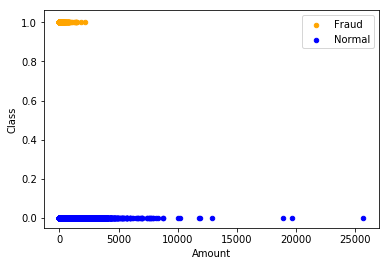

This feature looks important based on their distribution with respect to class.
We will now zoom in onto the fraud data to see the ranges of amount just for fun.


In [7]:
ax = frauds.plot.scatter(x='Amount', y='Class', color='Orange', label='Fraud')
non_frauds.plot.scatter(x='Amount', y='Class', color='Blue', label='Normal', ax=ax)
plt.show()
print("This feature looks important based on their distribution with respect to class.")
print("We will now zoom in onto the fraud data to see the ranges of amount just for fun.")

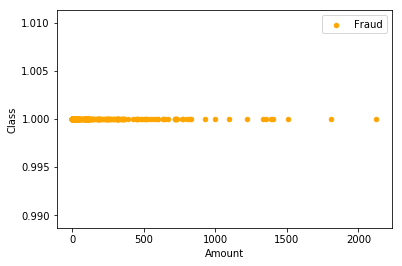

In [9]:
bx = frauds.plot.scatter(x='Amount', y='Class', color='Orange', label='Fraud')
plt.show()

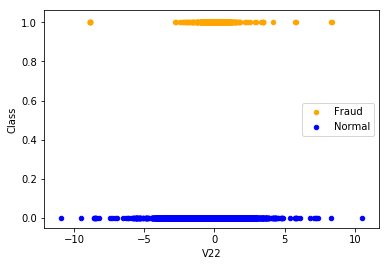

This feature may not be very important because of the similar distribution.


In [10]:
ax = frauds.plot.scatter(x='V22', y='Class', color='Orange', label='Fraud')
non_frauds.plot.scatter(x='V22', y='Class', color='Blue', label='Normal', ax=ax)
plt.show()
print("This feature may not be very important because of the similar distribution.")

# Logistic Regression (vanilla)

In [11]:
from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [12]:
X = df.iloc[:,:-1]
y = df['Class']

print("X and y sizes, respectively:", len(X), len(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)
print("Train and test sizes, respectively:", len(X_train), len(y_train), "|", len(X_test), len(y_test))
print("Total number of frauds:", len(y.loc[df['Class'] == 1]), len(y.loc[df['Class'] == 1])/len(y))
print("Number of frauds on y_test:", len(y_test.loc[df['Class'] == 1]), len(y_test.loc[df['Class'] == 1]) / len(y_test))
print("Number of frauds on y_train:", len(y_train.loc[df['Class'] == 1]), len(y_train.loc[df['Class'] == 1])/len(y_train))

X and y sizes, respectively: 284807 284807
Train and test sizes, respectively: 185124 185124 | 99683 99683
Total number of frauds: 492 0.001727485630620034
Number of frauds on y_test: 168 0.0016853425358386083
Number of frauds on y_train: 324 0.0017501782588967396


In [13]:
logistic = linear_model.LogisticRegression(C=1e5)
logistic.fit(X_train, y_train)
print("Score: ", logistic.score(X_test, y_test))

Score:  0.9990269153215694


In [14]:
y_predicted = np.array(logistic.predict(X_test))
y_right = np.array(y_test)

Confusion matrix:
Predicted  False  True  __all__
Actual                         
False      99473    42    99515
True          55   113      168
__all__    99528   155    99683


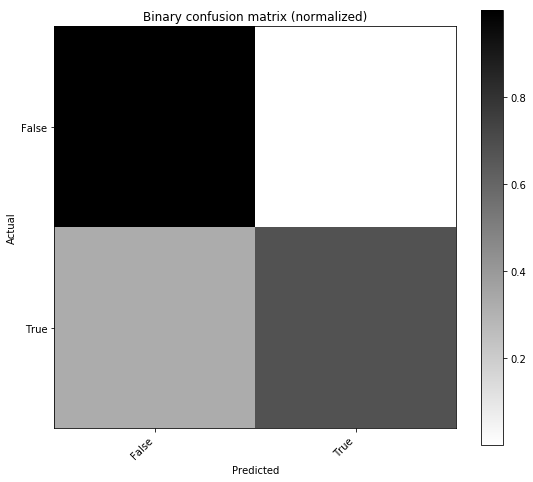

population: 99683
P: 168
N: 99515
PositiveTest: 155
NegativeTest: 99528
TP: 113
TN: 99473
FP: 42
FN: 55
TPR: 0.6726190476190477
TNR: 0.9995779530724012
PPV: 0.7290322580645161
NPV: 0.999447391688771
FPR: 0.0004220469275988544
FDR: 0.2709677419354839
FNR: 0.3273809523809524
ACC: 0.9990269153215694
F1_score: 0.6996904024767802
MCC: 0.6997727028320816
informedness: 0.6721970006914488
markedness: 0.728479649753287
prevalence: 0.0016853425358386083
LRP: 1593.7067743764173
LRN: 0.3275191808449577
DOR: 4865.995238095238
FOR: 0.0005526083112290009


In [16]:
confusion_matrix = ConfusionMatrix(y_right, y_predicted)
print("Confusion matrix:\n%s" % confusion_matrix)
confusion_matrix.plot(normalized=True)
plt.show()
confusion_matrix.print_stats()

In [17]:
print("FNR is {0}".format(confusion_matrix.stats()['FNR']))

FNR is 0.3273809523809524


# Logistic Regression with SMOTE over-sampling

In [21]:
df2 = pdml.ModelFrame(X_train, target=y_train)
sampler = df2.imbalance.over_sampling.SMOTE()
sampled = df2.fit_sample(sampler)
print("Size of training set after over sampling:", len(sampled))

Size of training set after over sampling: 369600


In [22]:
X_train_sampled = sampled.iloc[:,1:]
y_train_sampled = sampled['Class']

# NOTE: Scaling makes it worse.
# X_train_sampled = scale(X_train_sampled)

logistic = linear_model.LogisticRegression(C=1e5)
logistic.fit(X_train_sampled, y_train_sampled)
print("Score: ", logistic.score(X_test, y_test))

Score:  0.9862263374898428


Confusion matrix:
Predicted  False  True  __all__
Actual                         
False      98156  1359    99515
True          14   154      168
__all__    98170  1513    99683


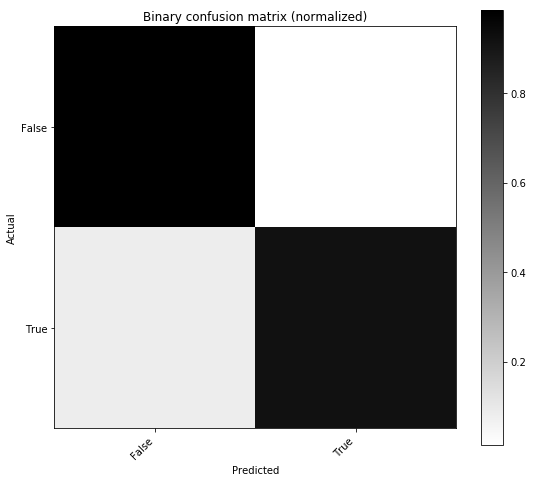

population: 99683
P: 168
N: 99515
PositiveTest: 1513
NegativeTest: 98170
TP: 154
TN: 98156
FP: 1359
FN: 14
TPR: 0.9166666666666666
TNR: 0.9863437672712656
PPV: 0.10178453403833443
NPV: 0.999857390241418
FPR: 0.013656232728734362
FDR: 0.8982154659616656
FNR: 0.08333333333333333
ACC: 0.9862263374898428
F1_score: 0.18322427126710292
MCC: 0.30295827790332064
informedness: 0.9030104339379323
markedness: 0.10164192427975238
prevalence: 0.0016853425358386083
LRP: 67.12441746382143
LRN: 0.08448710895581184
DOR: 794.4930095658572
FOR: 0.00014260975858205153


In [23]:
y_predicted1 = np.array(logistic.predict(X_test))
y_right1 = np.array(y_test)

confusion_matrix1 = ConfusionMatrix(y_right1, y_predicted1)
print("Confusion matrix:\n%s" % confusion_matrix1)
confusion_matrix1.plot(normalized=True)
plt.show()
confusion_matrix1.print_stats()

In [17]:
print("FNR is {0}".format(confusion_matrix1.stats()['FNR']))

FNR is 0.12987012987012986


# Logistic Regression with balanced class weights

In [28]:
best_c, best_fnr = 1, 1
for _ in range(20):
    c = random.uniform(1, 10000) # regularizationn parameter
    logistic = linear_model.LogisticRegression(C=c, class_weight="balanced")
    logistic.fit(X_train, y_train)
    #print("Score: ", logistic.score(X_test, y_test))
    y_predicted2 = np.array(logistic.predict(X_test))
    y_right2 = np.array(y_test)
    confusion_matrix2 = ConfusionMatrix(y_right2, y_predicted2)
    #print("Confusion matrix:\n%s" % confusion_matrix2)
    #confusion_matrix2.plot(normalized=True)
    #plt.show()
    #confusion_matrix2.print_stats()
    fnr = confusion_matrix2.stats()['FNR']
    if fnr < best_fnr:
        best_fnr = fnr
        best_c = c
print("Best C is {0} with best FNR of {1}.".format(best_c, best_fnr))

Best C is 4319.233641724194 with best FNR of 0.06547619047619048.


In [29]:
linear_model.LogisticRegression?